# **Final Project Task 3 - Census Modeling Regression**

Requirements
- Create a regression model on the Census dataset, with 'hours-per-week' target

- You can use models (estmators) from sklearn, but feel free to use any library for traditional ML. 
    - Note: in sklearn, the LinearRegression estimator is based on OLS, a statistical method. Please use the SGDRegressor estimator, since this is based on gradient descent. 
    - You can use LinearRegression estimator, but only as comparison with the SGDRegressor - Optional.

- Model Selection and Setup **2p**:
    - Implement multiple models, to solve a regression problem using traditional ML: 
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression - Optional
        - Ridge Regression - Optional
        - Lasso Regression - Optional
    - Choose a loss (or experiment with different losses) for the model and justify the choice. *1p*
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons. *1p*


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation **10p**
    - Establish a Baseline Model *2p*
        - For each model type, train a simple model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable. - Optional
    - Feature Selection: - Optional
        - Use insights from EDA in Task 2 to identify candidate features by analyzing patterns, relationships, and distributions.
    - Experimentation: *8p*
        - For each baseline model type, iteratively experiment with different combinations of features and transformations.
        - Experiment with feature engineering techniques such as interaction terms, polynomial features, or scaling transformations.
        - Identify the best model which have the best performance metrics on test set.
        - You may need multiple preprocessed datasets preprocessed
- Hyperparameter Tuning - Optional
  - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments. 
  - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
  - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
  - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation **3p**
    - Evaluate models on the test dataset using regression metrics: *1p*
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Choose one metric for model comparison and explain your choice *1p*
    - Compare the results across different models. Save all experiment results  into a table. *1p*

Feature Importance - Optional
- For applicable models (e.g., Decision Tree Regression), analyze feature importance and discuss its relevance to the problem.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


In [1]:
import pandas as pd

# 20 - 25% din date pe test
# 75 - 80% din date pe train (dintre care 20 - 25% pentru validation in timpul antrenarii)
#### nu uitat de train test split pentru o impartire echilibrata a datelor in functie de categorii
##### rmse ca metrica (mai ok); functii de procesare pentru model training, preprocess v1,v2,v3

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
17603,42,Local-gov,263871,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,8,United-States,<=50K
23273,22,Private,127768,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,32,United-States,>50K
6196,42,Private,210525,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,20,United-States,>50K
28314,45,Self-emp-not-inc,220978,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,<=50K
23452,49,Federal-gov,229376,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
13169,53,Private,108083,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,45,United-States,<=50K
29600,30,Private,374454,HS-grad,9,Divorced,Transport-moving,Own-child,Black,Male,0,0,40,United-States,<=50K
5742,42,Private,196001,HS-grad,9,Separated,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
26801,41,Private,178002,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
17568,52,Private,126978,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,Asian-Pac-Islander,Female,0,0,40,China,<=50K


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import time

#Importam toate librariile relevante conform cursurilor

In [4]:
#Incarcam datele de la TASK 1
X_train = pd.read_csv('X_train_FIN.csv')
X_test = pd.read_csv("X_test_FIN.csv")
y_train = pd.read_csv("y_train_FIN.csv")
y_test = pd.read_csv("y_test_FIN.csv")

In [5]:
#Inspectie rapida a tabelelor pentru transparenta
print(y_train.head())
print(y_train.info())

   hours-per-week
0            38.0
1            40.0
2            40.0
3            40.0
4            52.5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26029 entries, 0 to 26028
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hours-per-week  26029 non-null  float64
dtypes: float64(1)
memory usage: 203.5 KB
None


In [6]:
#Pentru modelare vedem daca taregtul este un array
target_hours = y_train.columns[0]
y_train_ARR = y_train[target_hours]
y_test_ARR = y_test[target_hours]

In [9]:
#Impartim datele de train in train si validare (20% din total)
X_trainSP, X_valid, y_trainSP, y_valid = train_test_split(X_train, y_train_ARR, test_size=0.2, random_state=42)
print(f'Data split:')
print(f'Train: {X_trainSP.shape}')
print(f'Validation: {X_valid.shape}')
print(f'Test: {X_test.shape}')


Data split:
Train: (20823, 77)
Validation: (5206, 77)
Test: (6508, 77)


In [ ]:
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2
results_list = []
#Am creat functia care va analiza metricile pentru datele noastre, dupa cum urmeaza

In [15]:
#Pentru SGDRegressor, unde vom face fit pe datele de train
sgd_1 = SGDRegressor(random_state=42)
sgd_1.fit(X_trainSP, y_trainSP)
y_val_pred = sgd_1.predict(X_valid)
metrici1 = calculate_metrics(y_valid, y_val_pred)
results_list.append({
    'Test 1': 'Baseline SGDRegressor',
    'Model': 'SGDRegressor',
    'MAE': metrici1[0],
    'MSE': metrici1[1],
    'RMSE': metrici1[2],
    'R^2': metrici1[3]
})

In [ ]:
#Pentru Decision Tree Regressor
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree.fit(X_trainSP, y_trainSP)
y_val_pred = dec_tree.predict(X_valid)
metrici1 = calculate_metrics(y_valid, y_val_pred)
results_list.append({
    'Test 1': 'Baseline DecisionTree',
    'Model': 'DecisionTree Regressor',
    'MAE': metrici1[0],
    'MSE': metrici1[1],
    'RMSE': metrici1[2],
    'R^2': metrici1[3]
})

In [19]:
#Voi incerca si pentru Random Forest
ran_f = RandomForestRegressor(random_state=42)
ran_f.fit(X_trainSP, y_trainSP)
y_val_pred = ran_f.predict(X_valid)
metrici1 = calculate_metrics(y_valid, y_val_pred)
results_list.append({
    'Test 1': 'Random Forest',
    'Model': 'Random Forest Regressor',
    'MAE': metrici1[0],
    'MSE': metrici1[1],
    'RMSE': metrici1[2],
    'R^2': metrici1[3]
})

In [20]:
#In final, Ridge
b_ridge = Ridge(random_state=42)
b_ridge.fit(X_trainSP, y_trainSP)
y_val_pred = b_ridge.predict(X_valid)
metrici1 = calculate_metrics(y_valid, y_val_pred)
results_list.append({
    'Test 1': 'Baseline Ridge',
    'Model': 'Ridge',
    'MAE': metrici1[0],
    'MSE': metrici1[1],
    'RMSE': metrici1[2],
    'R^2': metrici1[3]
})

In [21]:
#Vom genera un tabel cu toate modelele, astfel
results_fin = pd.DataFrame(results_list)
print(results_fin)

                  Test 1                    Model       MAE        MSE  \
0  Baseline SGDRegressor             SGDRegressor  4.482781  31.240964   
1  Baseline DecisionTree   DecisionTree Regressor  5.588023  60.950478   
2          Random Forest  Random Forest Regressor  4.360266  31.456855   
3         Baseline Ridge                    Ridge  4.462785  31.144261   

       RMSE       R^2  
0  5.589362  0.178935  
1  7.807079 -0.601880  
2  5.608641  0.173261  
3  5.580704  0.181477  


In [22]:
#Adugam functiile polinomiale, facem fit pe train si transform pe test
coloane = ['age', 'fnlwgt', 'education-num', 'capital']
pol = PolynomialFeatures(degree =2, include_bias=False)
X_train_poly = X_trainSP.copy()
X_val_poly = X_valid.copy()

poly_train = pol.fit_transform(X_trainSP[coloane])
poly_valid = pol.transform(X_valid[coloane])

#Evitam duplicate
poly_trainDF = pd.DataFrame(poly_train, columns=pol.get_feature_names_out(coloane), index=X_trainSP.index)
poly_validDF = pd.DataFrame(poly_valid, columns=pol.get_feature_names_out(coloane), index=X_valid.index)

X_train_exp1 = X_trainSP.drop(columns=coloane).join(poly_trainDF)
X_val_exp1 = X_valid.drop(columns=coloane).join(poly_validDF)

In [23]:
#SGDRegressor polinomial
sgd_pol = SGDRegressor(random_state=42)
sgd_pol.fit(X_train_exp1, y_trainSP)
y_val_pred = sgd_pol.predict(X_val_exp1)
metrici1 = calculate_metrics(y_valid, y_val_pred)
results_list.append({
    'Test 1': 'SGDRegressor and Polynomial Features',
    'Model': 'SGDRegressor',
    'MAE': metrici1[0],
    'MSE': metrici1[1],
    'RMSE': metrici1[2],
    'R^2': metrici1[3]
})

In [ ]:
selectie = SelectFromModel(ran_f, threshold='median')
X_tr_selectie = selectie.transform(X_trainSP)
X_val_selectie = selectie.transform(X_valid)

#Random Forest si feature selection
ranf_selectie = RandomForestRegressor(random_state=42, n_jobs=-1)
ranf_selectie.fit(X_tr_selectie, y_trainSP)
y_val_pred = ranf_selectie.predict(X_val_selectie)
metrici1 = calculate_metrics(y_valid, y_val_pred)
results_list.append({
    'Test 1': 'Random Forest and feature selection',
    'Model': 'Random Forest Regressor',
    'MAE': metrici1[0],
    'MSE': metrici1[1],
    'RMSE': metrici1[2],
    'R^2': metrici1[3]
})

c:\Users\iacob\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\iacob\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [25]:
#SGDregressor si Huber Loss
sgd_huber = SGDRegressor(loss='huber', random_state=42)
sgd_huber.fit(X_trainSP, y_trainSP)
y_val_pred = sgd_huber.predict(X_valid)
metrici1 = calculate_metrics(y_valid, y_val_pred)
results_list.append({
    'Test 1': 'SGDRegressor and Huber Loss',
    'Model': 'RSGDRegressor',
    'MAE': metrici1[0],
    'MSE': metrici1[1],
    'RMSE': metrici1[2],
    'R^2': metrici1[3]
})

In [26]:
results_fin = pd.DataFrame(results_list)
print(results_fin)

                                 Test 1                    Model  \
0                 Baseline SGDRegressor             SGDRegressor   
1                 Baseline DecisionTree   DecisionTree Regressor   
2                         Random Forest  Random Forest Regressor   
3                        Baseline Ridge                    Ridge   
4  SGDRegressor and Polynomial Features             SGDRegressor   
5   Random Forest and feature selection  Random Forest Regressor   
6           SGDRegressor and Huber Loss            RSGDRegressor   

            MAE           MSE          RMSE           R^2  
0  4.482781e+00  3.124096e+01  5.589362e+00  1.789355e-01  
1  5.588023e+00  6.095048e+01  7.807079e+00 -6.018800e-01  
2  4.360266e+00  3.145686e+01  5.608641e+00  1.732615e-01  
3  4.462785e+00  3.114426e+01  5.580704e+00  1.814770e-01  
4  2.887964e+10  9.940658e+22  3.152881e+11 -2.612570e+21  
5  4.373411e+00  3.164833e+01  5.625685e+00  1.682292e-01  
6  5.561837e+00  5.150639e+01  7.17

In [27]:
#Incercam din nou SGDR si functii polinomiale intr-un pipeline scalat
poly_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('sgdr', SGDRegressor(random_state=42))
])

In [29]:
poly_pipe.fit(X_trainSP[coloane], y_trainSP)
y_val_pred = poly_pipe.predict(X_valid[coloane])
metrici1 = calculate_metrics(y_valid, y_val_pred)
results_list.append({
    'Test 1': 'SGDRegressor and Scaling',
    'Model': 'RSGDRegressor',
    'MAE': metrici1[0],
    'MSE': metrici1[1],
    'RMSE': metrici1[2],
    'R^2': metrici1[3]
})

In [35]:
#Pentru Hyperparameter pe Random Forest tuning voi incerca folosind urmatoarele 
parameter_grid = {
    'n_estimators': [50,100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2,5]
}

ranf_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions = parameter_grid, n_iter=5, cv=3, scoring= 'neg_mean_squared_error', random_state=42, n_jobs=-1)
ranf_search.fit(X_trainSP, y_trainSP)
best_rf = ranf_search.best_estimator_
y_val_pred = best_rf.predict(X_valid)
metrici1 = calculate_metrics(y_valid, y_val_pred)
results_list.append({
    'Test 1': 'Random Forest with Tuning',
    'Model': 'Random Forest Regressor',
    'MAE': metrici1[0],
    'MSE': metrici1[1],
    'RMSE': metrici1[2],
    'R^2': metrici1[3]
})

In [36]:
results_fin = pd.DataFrame(results_list)
print(results_fin)

                                 Test 1                    Model  \
0                 Baseline SGDRegressor             SGDRegressor   
1                 Baseline DecisionTree   DecisionTree Regressor   
2                         Random Forest  Random Forest Regressor   
3                        Baseline Ridge                    Ridge   
4  SGDRegressor and Polynomial Features             SGDRegressor   
5   Random Forest and feature selection  Random Forest Regressor   
6           SGDRegressor and Huber Loss            RSGDRegressor   
7              SGDRegressor and Scaling            RSGDRegressor   
8             Random Forest with Tuning  Random Forest Regressor   

            MAE           MSE          RMSE           R^2  
0  4.482781e+00  3.124096e+01  5.589362e+00  1.789355e-01  
1  5.588023e+00  6.095048e+01  7.807079e+00 -6.018800e-01  
2  4.360266e+00  3.145686e+01  5.608641e+00  1.732615e-01  
3  4.462785e+00  3.114426e+01  5.580704e+00  1.814770e-01  
4  2.887964e+10  9.

In [37]:
#Acum vom verifica care este modelul optim
valid_res = results_fin[results_fin['R^2'] > -1]
best_res = valid_res.loc[valid_res['MSE'].idxmin()]
print('Modelul optim este:')
print(best_res)

Modelul optim este:
Test 1    Random Forest with Tuning
Model       Random Forest Regressor
MAE                        4.271418
MSE                       29.527278
RMSE                       5.433901
R^2                        0.223974
Name: 8, dtype: object


In [ ]:
if best_res['Model'] == 'Random Forest Regressor':
    model_final = best_rf
elif best_res['Model'] == 'SGDRegressor' and 'Polynomial' in best_res['Test 1']:
    model_final = poly_pipe
elif best_res['Model'] == 'SGDRegressor':
    model_final = sgd_1
else:
    model_final = b_ridge
#testam criteriile pentru modelul optim

In [39]:
if 'Polynomial' in best_res['Test 1']:
    X_test_FIN = X_test[coloane]
else: 
    X_test_FIN = X_test

y_test_pred = model_final.predict(X_test_FIN)
test_metrics =calculate_metrics(y_test_ARR, y_test_pred)

In [ ]:
print('Final performances on data set:')
print(f'MAE: {test_metrics[0]:.4f}')
print(f'MSE: {test_metrics[1]:.4f}')
print(f'RMSE: {test_metrics[2]:.4f}')
print(f'R^2: {test_metrics[3]:.4f}')

#Tuned Random Forest

Final performances on data set:
MAE: 4.2739
MSE: 29.2902
RMSE: 5.4120
R^2: 0.2422


In [42]:
results_fin.to_csv('Rezultate_experimente.csv', index=False)


Top 5 features
relationship_Wife    0.056229
education-num        0.062557
is-married_1         0.064685
fnlwgt               0.085397
age                  0.393251
dtype: float64


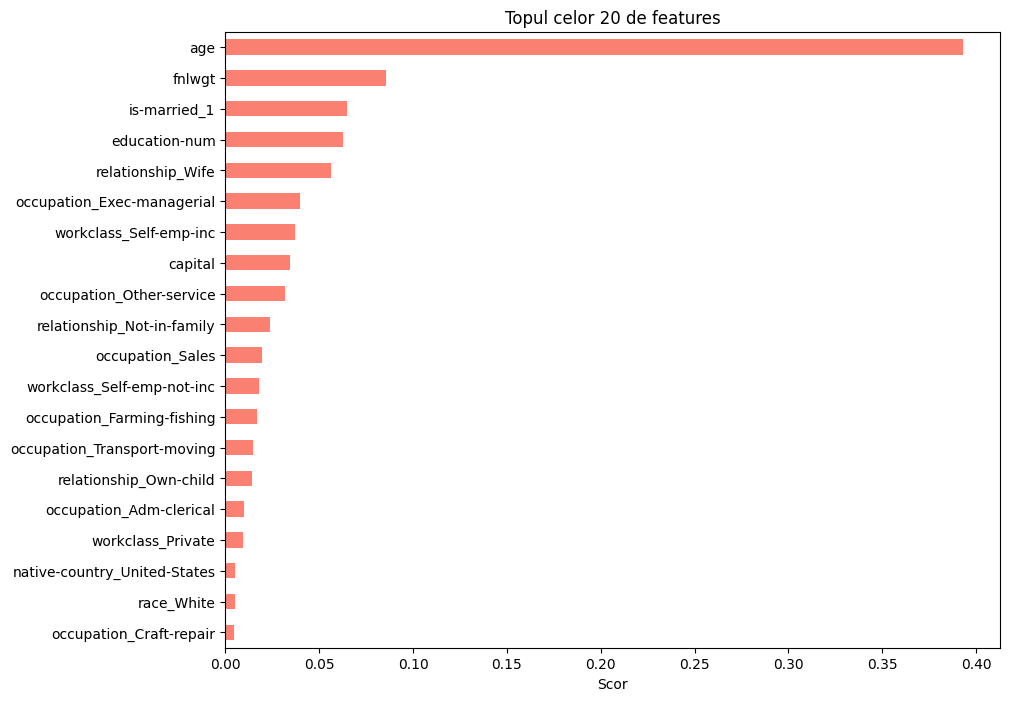

In [44]:
imp = best_rf.feature_importances_
feat_names = X_trainSP.columns
feat_imp = pd.Series(imp, index=feat_names)
top20_feat = feat_imp.nlargest(20).sort_values(ascending=True)

#Vom plota rezultatele, dupa care va urma analiza
plt.figure(figsize=(10,8))
top20_feat.plot(kind='barh', color='salmon')
plt.title('Topul celor 20 de features')
plt.xlabel('Scor')
plt.tight_layout
plt.savefig('CENSUS_feat.png')

print("Top 5 features")
print(top20_feat.tail(5))


# Analiza pe scurt si argumente
#### Pentru acest task am implementat mai multe modele-test, precum SGDRegressor, Decision Tree (model non linear), si am testat si doua modele optionale pentru cautarea rezultatului optim (Random Forest - reducerea de variatie; Ridge - pentru evitarea overfit-ului)
#### Pentru functia de loss, am optat pentru MSE intrucat ajuta la manipularea erorilor mai bine, mai ales in cazul unei baze de date ce vizeaza orele de lucru bazandu-se pe variabile precum varsta, educatia, sexul, ocupatia etc.
#### Dupa importarea datelor din Task 1, am separat un extra set de date pentru validare, 20% din setul de train.
#### Am inceput analiza cu modelele baseline, utilizand setarile si forma de baza a datelor. Features polinomiale au necesitat scaling pentru prelucrare, si am experimentat si cu Huber Loss pentru ca manipuleaza outliers mai bine pentru MSE, dar R^2 a aratat ca este nesemnificativ pentru baza de date propusa
#### Modelul optim in cazul de fata a fost Tuned Random Forest, asa cum reiese si din blocul de cod care cauta modelul final.

#### Argumente: acesta a avut cele mai mici rate de erori conform MAE, MSE si RMSE, si cel mai mare R patrat, explicand cu acuratete ridicata (comparativ cu celelalte modele) variatia targetului de ore de lucru saptamanale.
#### Modelul reduce riscul de overfitting, comparativ cu celelalte modele de tip Decision Tree.
#### Datele fiind nonlineare, un astfel de model este semnificativ mai potrivit pentru analiza. Vedem, de asemenea, similar cu Task 2, ca varsta si educatia reprezinta variabile valoroase pentru predictia modelului.

#### In ceea ce priveste limitarile, facand abstractie de artefactele de realizare a bazei de date cu privire la aspecte sociale/organizationale, posibila creatie de features ce combina intr-un fel vasrta, educatia si ocupatia pot genera modele si mai predictive. In esenta, desi modelul a propus un rezultat satisfacator, o analiza mult mai detaliata a statutului indivizilor + variabile noi in baza de date ar putea mari sansele pentru un model aditional.
